<a href="https://colab.research.google.com/github/rakkaalhazimi/Elements-of-statistical-learning/blob/main/chapter3/Orthogonal_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg, stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
def orthogonalize(X):
    p = X.shape[1]
    G = np.eye(p)
    Z = X.copy()
    for j in range(1, p): # for j = 1, 2, ..., p
        for l in range(j): # for l <= j
            G[l, j] = np.dot(Z[:, l], X[:, j]) / np.dot(Z[:, l], Z[:, l])
        for k in range(j): # for k <= j
            Z[:, j] -= G[k, j] * Z[:, k]
    return Z, G

def least_squares_qr(data_x, data_y):
    X = np.c_[np.ones((len(data_x), 1)), data_x]
    Z, G = orthogonalize(X)

    D = linalg.norm(Z, axis=0)
    Q = Z / D
    R = np.diag(D) @ G
    beta = linalg.solve_triangular(R, Q.T @ data_y)
    
    return Q, R, beta

x = np.array([[1, 2], [3, 2], [4, 3], [5, 3]], dtype="float")
y = np.array([[3], [4], [6], [8]])
q, r, beta = least_squares_qr(x, y)

In [ ]:
def orthogonal_projection(y, x):
    return np.dot(x, y) / np.dot(x, x)

def orthogonal_lq(data_x):
    # One values vector
    init_ones = np.ones(data_x.shape[0])

    # Add constant one to variable X and Z
    X = np.column_stack((init_ones, data_x))
    Z = X.copy()
    G = np.eye(X.shape[-1])

    # p-dimension
    p = X.shape[-1]

    for j in range(p):
        for l in range(j):
            G[l, j] = orthogonal_projection(X[:, j], Z[:, l])
        for k in range(j):
            Z[:, j] -= G[k, j] * Z[:, k]

    return Z, G

x = np.array([[1, 2], [3, 2], [4, 3], [5, 3]], dtype="float")
x_swap = x.copy()
x_swap[:, 0], x_swap[:, 1] = x[:, 1], x[:, 0]

y = np.array([[3], [4], [6], [8]])
z, g = orthogonal_lq(x)

orthogonal_projection(y, z[:, -1])

array([1.5])

In [ ]:
linreg = LinearRegression()
linreg.fit(x, y)
linreg.intercept_

array([-1.1])

# Significance Test

In [ ]:
y_true = y                                      # true y
y_pred = linreg.predict(x)                      # pred y
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)                             # std of linear regression
diag = linalg.inv(np.matmul(x.T, x))

init_ones = np.ones(x.shape[0])
x_test = np.column_stack((init_ones, x))

def diag_op(x):
    return linalg.inv(np.matmul(x.T, x))

x_diag = diag_op(x_test)


array([[10.1,  1.2, -5.5],
       [ 1.2,  0.4, -1. ],
       [-5.5, -1. ,  3.5]])

array([10.1,  0.4,  3.5])

In [ ]:
# Significance test for B1
b1 = linreg.coef_.flatten()[0]

z_score = b1 / (rmse * np.diag(x_diag)[1])
z_score

4.216370213557864

# Singularity

In [ ]:
A = np.array([[2, 3, 5], 
              [1, 2, 3], 
              [4, 2, 6]])

np.matmul(A.T, A)

array([[21, 16, 37],
       [16, 17, 33],
       [37, 33, 70]])

In [ ]:
Q = np.array([[1, 1], 
              [1, -1]])

np.matmul(Q.T, Q)

array([[2, 0],
       [0, 2]])

# Hat matrix method

In [ ]:
def hat_matrix(x):
    return np.matmul(x, np.matmul(
                    linalg.inv(np.matmul(x.T, x)), x.T))
    
hat = hat_matrix(x_test)
np.matmul(hat, y)

array([[2.7],
       [4.3],
       [6.6],
       [7.4]])

In [ ]:
linreg.predict(x)

array([[2.7],
       [4.3],
       [6.6],
       [7.4]])

# Visualization Test

In [ ]:
a = np.array([2, 4])
b = np.array([3, 2])

# Data
x = a
y = np.array([4, 7])

# Z and G values
Z, G = orthogonal_lq(x)
z0, z1 = np.hsplit(Z, 2)

# coeff
c = z0 * G[0, 1]
c

# y-hat
y_h = x * orthogonal_projection(y, z1.flatten())
y_h

array([3., 6.])

In [ ]:
z1y = z1 * orthogonal_projection(y, z1.flatten())
r = y - z1y.flatten()
r

array([5.5, 5.5])

In [ ]:
def create_arrow(ax, dx, dy, label=None, color=None):
    ax.arrow(0, 0, dx, dy, 
             head_width=0.2,
             ec=color, fc=color, label=label)
    offset = 1.1
    ax.text(dx * offset, dy * offset, label)


def create_vector(vectors: list, name: list, colors: list):

    # Flatten all vectors
    vectors = list(map(lambda x: x.flatten(), vectors))

    fig, ax = plt.subplots(figsize=(10, 10))
    limit = (-15, 15)
    
    ax.vlines(0, *limit, linestyles="dashed")
    ax.hlines(0, *limit, linestyles="dashed")

    ax.set_aspect("equal")
    ax.set(xlim=limit, ylim=limit)

    for index, (x, y) in enumerate(vectors):
        create_arrow(ax, x, y, name[index], colors[index])
    plt.show()

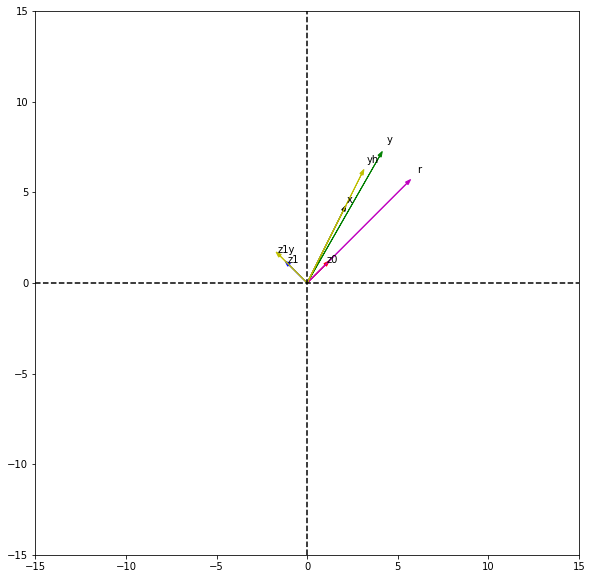

In [ ]:
vectors = [y, x, z0, z1, z1y, r, y_h] #c, y_h]
names = ["y", "x", "z0", "z1", "z1y", "r", "yh"] # "c", "y_h"]
colors = ["g", "k", "r", "b", "y", "m", "y"] # "y", "m"]

create_vector(vectors, names, colors)

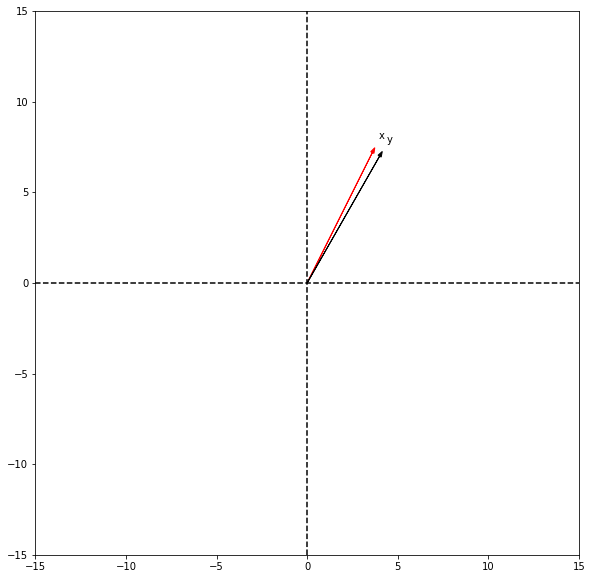

In [ ]:
xx = (x * orthogonal_projection(y, x))

create_vector([xx, y], ["x", "y"], ["r", "k"])

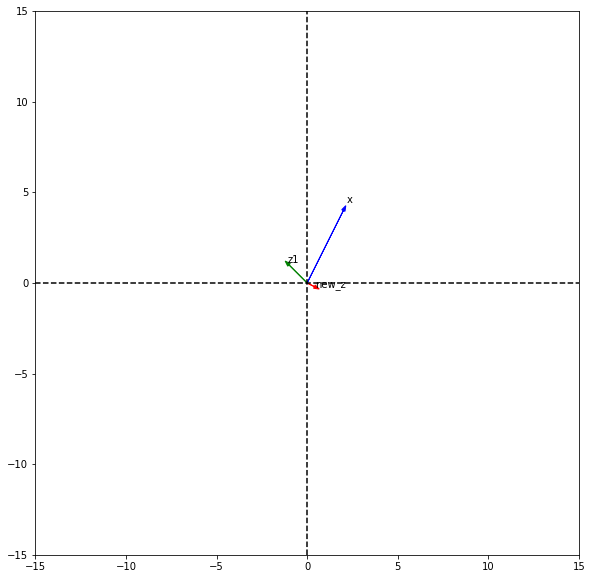

In [ ]:
new_c = (x * orthogonal_projection(z0.flatten(), x))
new_z = z0.flatten() - new_c
create_vector([new_z, z1, x], ["new_z", "z1", "x"], ["r", "g", "b"])

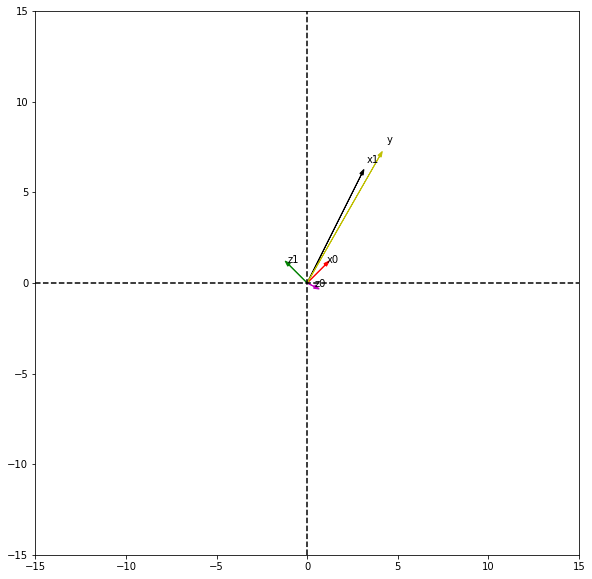

In [ ]:
B0 = orthogonal_projection(y, new_z)
B1 = orthogonal_projection(y, z1.flatten())

e1 = np.array([1, 1]) * B0
e2 = x * B1

vectors = [e1, e2, e1 + e2, z1, new_z]
names = ["x0", "x1", "y", "z1", "z0"]
colors = ["r", "k", "y", "g", "m"]
create_vector(vectors, names, colors)